Prepared by: Ömer Coşkun <br>
*Quick note: This notebook is prepared to show how an acceptable solution should look like. Better solutions are always possible.*                         

In [1]:
import warnings
warnings.filterwarnings('ignore')

import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim

from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import numpy as np

import torchvision.datasets as datasets 
import torchvision.transforms as transforms
import time

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

Using cpu device


# MNIST HAND WRITTEN NUMBER

Define various neural network structures with tanh, sigmoid, linear, relu, define number of neurons in each layer and forward the input data to one-hot-coding for numbers 0-9. **You are NOT expected to use Convolution Layers!** <br>
*Hint: Input files are 28x28 images.*
<br>
*Hint: Use .view method in the forward function to make a column vector from 28x28 image*


In [3]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.layer1 = nn.Linear(28*28, 256)
        self.layer2 = nn.Linear(256, 128)
        self.layer3 = nn.Linear(128, 64)
        self.layer4 = nn.Linear(64, 10)

    def forward(self, img): #convert + flatten
        
        img = img.view(img.size(0), -1)
        img = F.relu(self.layer1(img))
        img = F.relu(self.layer2(img))
        img = F.relu(self.layer3(img))
        x = self.layer4(img)
        
        return x

In [4]:
## Normalization and create a tensor for a training/test set 

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])


mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

In [5]:
model = Net().to(device)

calculate_loss = nn.CrossEntropyLoss()
optimizer =  optim.Adam(model.parameters(), lr=0.0001)
batch_size = 512
epoch = 15

train_loader = torch.utils.data.DataLoader(mnist_trainset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_testset, batch_size=batch_size, shuffle=True)

for epoch in range(epoch):
    running_loss = 0.0
    start = time.time() #record run TIME
    
    for i,data in enumerate(train_loader): #In each epoch iterate the training data in the loader
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()  #Sets the gradients of all optimized torch.Tensor s to zero.
        output = model(inputs.view(-1, 28*28))
        loss = calculate_loss(output, labels) #calculate a loss for backpropogation
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 20 == 19:    # print every 20 mini-batches
            print('[%d, %5d] training loss: %.5f' %
            (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0
    end=time.time()
    print("for this epoch time passed:", end-start)
        
print('Finished Training')

[1,    20] training loss: 0.45313
[1,    40] training loss: 0.42955
[1,    60] training loss: 0.38831
[1,    80] training loss: 0.33172
[1,   100] training loss: 0.26909
for this epoch time passed: 6.2078328132629395
[2,    20] training loss: 0.17996
[2,    40] training loss: 0.15784
[2,    60] training loss: 0.13808
[2,    80] training loss: 0.12501
[2,   100] training loss: 0.11513
for this epoch time passed: 6.099910736083984
[3,    20] training loss: 0.10107
[3,    40] training loss: 0.09496
[3,    60] training loss: 0.09024
[3,    80] training loss: 0.08591
[3,   100] training loss: 0.08559
for this epoch time passed: 6.00215220451355
[4,    20] training loss: 0.07691
[4,    40] training loss: 0.07439
[4,    60] training loss: 0.07476
[4,    80] training loss: 0.07265
[4,   100] training loss: 0.07343
for this epoch time passed: 6.0715720653533936
[5,    20] training loss: 0.06800
[5,    40] training loss: 0.06452
[5,    60] training loss: 0.06824
[5,    80] training loss: 0.06465

In [6]:
correct =0
total=0

# Calculate predictions in test data. Call the model. Take the maximum value in one hot coding for 0-9. 

with torch.no_grad():  #The wrapper with torch.no_grad() temporarily sets all of the requires_grad flags to false
    for data in test_loader:
        inputs, labels = data
        output = model(inputs.to(device).view(-1, 784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == labels[idx]:
                correct +=1
            total +=1
print(f'accuracy: {round(correct/total, 3)}')

accuracy: 0.948


In [7]:
## This function takes a loader, NN model structure, Nth batch selection for either train or test and returns  
## Nth batch data for plotting and debugging


def TakesamplesfromNthBatch(loader,N,model):
    
    inputsout=[]
    labelsout=[]
    
    for i,data in enumerate(train_loader):
        inputs, labels = data
        inputsout=inputs.squeeze().numpy()
        labelsout=labels.numpy()    
           
        if i==N:
            prediction = model(inputs.to(device).view(-1, 784))
            predictionout = np.argmax(prediction.detach().cpu().numpy(),axis=1) 
            break

    return inputsout, labelsout, predictionout

Batch_Size=  512
True Label = 0 
True Label = 9 
True Label = 4 
True Label = 7 
True Label = 4 


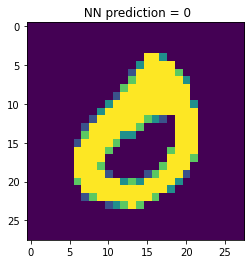

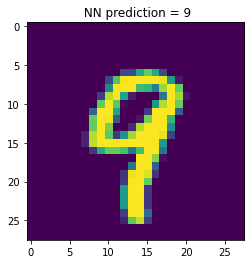

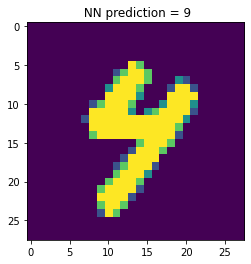

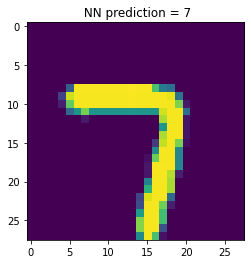

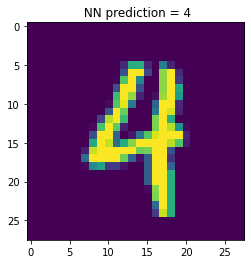

In [8]:
#Get some training or test data samples to visualize the predictions.

trial_input,trial_labels,trial_prediction = TakesamplesfromNthBatch(train_loader,1,model)
print('Batch_Size= ', batch_size)

numberIntheBatch=0 # should be less than batch_size used in loader.
Nofexamples=5
for i in range(Nofexamples):    
    
    plt.figure()
    imgplot = plt.imshow(trial_input[numberIntheBatch])
    plt.title(' NN prediction = %i'  %trial_prediction[numberIntheBatch])
    print('True Label = %i ' %trial_labels[numberIntheBatch])
    numberIntheBatch=numberIntheBatch+1 # should be less than batch_size used in loader.